In [1]:
%load_ext autoreload
%autoreload 2

from propose.utils.rat7m.loaders import load_cameras, load_mocap
from pathlib import Path

import numpy as np
from tqdm import tqdm

import imageio

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import animation

from IPython.display import HTML

In [2]:
home = str(Path.home())

mocap_path = f'{home}/data/rat7m/mocap-s4-d1.mat'
vid_path = f'{home}/data/rat7m/s4-d1/s4-d1-camera4-0.mp4'

cameras = load_cameras(mocap_path)
mocap = load_mocap(mocap_path)

vid = imageio.get_reader(vid_path)

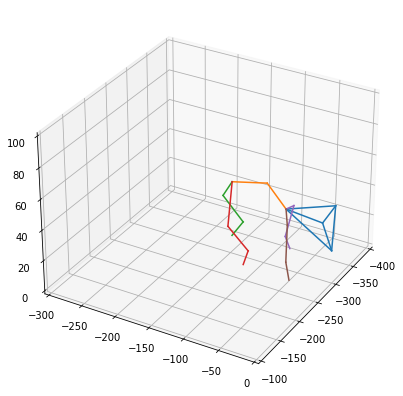

In [3]:
pose_idx = 500
pose = mocap[pose_idx]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

pose.plot(ax)

ax.view_init(30,  30)
ax.set_xlim(-400, -100)
ax.set_ylim(-300, 0)
ax.set_zlim(0, 100)

plt.show()

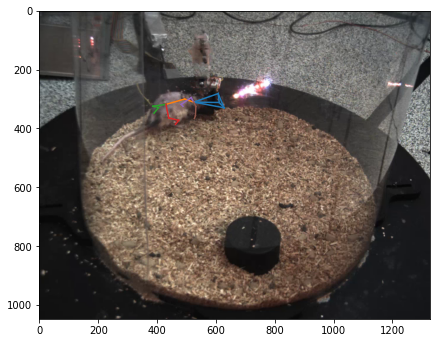

In [4]:
pose_idx = 500

camera = cameras['Camera4']

frame_idx = camera.frame.squeeze()[pose_idx]

im = vid.get_data(frame_idx)

pose = mocap[pose_idx]
pose2D = pose.proj2D(camera)

plt.figure(figsize=(7, 7))
plt.imshow(im)
pose2D.plot(plt.gca())
plt.show()


In [11]:
pose_idx = 500

camera = cameras['Camera4']
frame_idx = camera.frame.squeeze()[pose_idx]
im = vid.get_data(frame_idx)

pose = mocap[pose_idx]
pose2D = pose.proj2D(camera)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.get_proj = lambda: np.dot(Axes3D.get_proj(ax1), np.diag([1, 1, 0.75, 1]))
ax1.view_init(30,  30)
ax1.set_xlim(-400, -100)
ax1.set_ylim(-300, 0)
ax1.set_zlim(0, 100)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Camera 4')
plt.axis('off')

img = ax2.imshow(im)
lines1 = pose.plot(ax1)
lines2 = pose2D.plot(ax2)

plt.close(fig)

def animate(i):
    frame_idx = i + camera.frame.squeeze()[pose_idx]

    im = vid.get_data(frame_idx)

    pose = mocap[pose_idx + i]
    pose2D = pose.proj2D(camera)

    img.set_data(im)

    pose.animate(lines1)
    pose2D.animate(lines2)

ani = animation.FuncAnimation(fig, animate, frames=100)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=-1)

pbar = tqdm(total=100, position=0)

ani.save('walk_cam_4_sub.mp4', writer=writer, progress_callback=lambda i, n: pbar.update(1))
HTML(ani.to_html5_video())

/usr/local/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(
100%|██████████| 100/100 [00:25<00:00,  3.84it/s]

In [4]:
pose_idx = 500

camera = cameras['Camera4']
frame_idx = camera.frame.squeeze()[pose_idx]
im = vid.get_data(frame_idx)

pose_set = mocap[pose_idx:pose_idx+500]
pose2D_set = pose_set.proj2D(camera)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.get_proj = lambda: np.dot(Axes3D.get_proj(ax1), np.diag([1, 1, 0.75, 1]))
ax1.view_init(30,  30)
ax1.set_xlim(-400, -100)
ax1.set_ylim(-300, 0)
ax1.set_zlim(0, 100)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Camera 4')
plt.axis('off')

img = ax2.imshow(im)
lines1, animate1 = pose_set.animate(ax1)
lines2, animate2 = pose2D_set.animate(ax2)

plt.close(fig)

def animate(i):
    frame_idx = i + camera.frame.squeeze()[pose_idx]
    im = vid.get_data(frame_idx)

    img.set_data(im)

    animate1(i)
    animate2(i)

ani = animation.FuncAnimation(fig, animate, frames=100)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=-1)

pbar = tqdm(total=100, position=0)

ani.save('walk_cam_4_sub.mp4', writer=writer, progress_callback=lambda i, n: pbar.update(1))
HTML(ani.to_html5_video())

100%|██████████| 100/100 [00:23<00:00,  4.22it/s]